## Dependencies

In [ ]:
pip install tensorflow
pip install scikit-learn
pip install matplotlib
pip install Pillow

<blockquote> Taking 224x224 pixels images as input. </blockquote>


<>:11: SyntaxWarning: invalid escape sequence '\I'
<>:11: SyntaxWarning: invalid escape sequence '\I'
C:\Users\Admin\AppData\Local\Temp\ipykernel_18624\3464917448.py:11: SyntaxWarning: invalid escape sequence '\I'
  path = 'D:\Intel Unnati\Intel-Unnati-Project\Detection'  # Replace with your actual dataset path


Found 12 images belonging to 3 classes.
Found 2 images belonging to 3 classes.
Epoch 1/50


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0000e+00 - loss: 2.3419 - val_accuracy: 0.0000e+00 - val_loss: 2.5861
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.0000e+00 - loss: 1.7713 - val_accuracy: 0.0000e+00 - val_loss: 2.0204
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.0000e+00 - loss: 1.2354 - val_accuracy: 0.0000e+00 - val_loss: 1.4823
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.0833 - loss: 0.7406 - val_accuracy: 0.0000e+00 - val_loss: 0.9575
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.0833 - loss: 0.2839 - val_accuracy: 0.0000e+00 - val_loss: 0.4620
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.1667 - loss: -0.1363 - val_accuracy: 0.0000e+00 - val_loss: 0.0088
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.1667 - loss: -0.5195 - val_accuracy: 0.0000e+00 - val_loss: -0.4080
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.1667 - loss: -0.8723 - va

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.0000e+00 - loss: -13.0225
Validation Accuracy: 0.00%


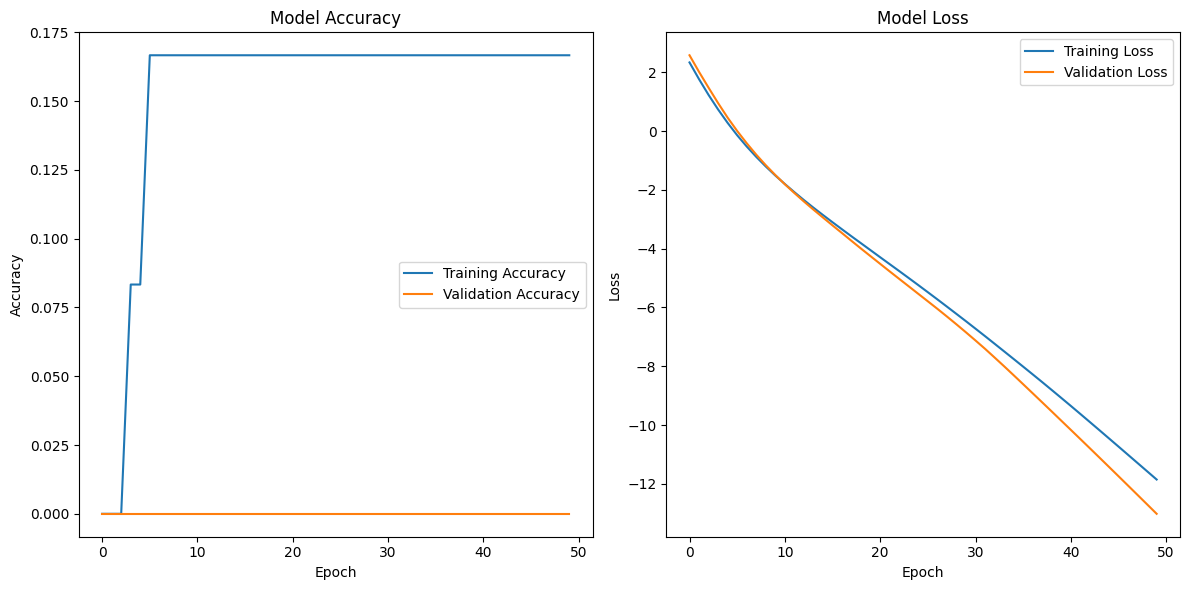

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define the path to your dataset
path = 'D:\Intel Unnati\Intel-Unnati-Project\Detection'  # Replace with your actual dataset path

# Load the MobileNetV2 model, pre-trained on ImageNet
model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
model.trainable = False

# Add custom layers on top
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)  # Binary classification: pixelated vs non-pixelated

model = Model(inputs=model.input, outputs=outputs)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Prepare data generators
training_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = training_datagen.flow_from_directory(
    path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
validation_generator = training_datagen.flow_from_directory(
    path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Define early stopping callback
earlyStopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(train_generator, 
                    validation_data=validation_generator, 
                    epochs=50,  # Increase if validation performance improves
                    callbacks=[earlyStopping])

# Save the model after training
model.save('pixel_detection_model.h5')

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Preparing Data Generators

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the path to your dataset
path = 'D:\Intel Unnati\Intel-Unnati-Project\Detection'  # Replace with your actual dataset path

# Load the MobileNetV2 model, pre-trained on ImageNet
model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
model.trainable = False

# Add custom layers on top
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)  # Binary classification: pixelated vs non-pixelated

model = Model(inputs=model.input, outputs=outputs)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Prepare data generators
training_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = training_datagen.flow_from_directory(
    path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
validation_generator = training_datagen.flow_from_directory(
    path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Define early stopping callback
earlyStopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


<>:10: SyntaxWarning: invalid escape sequence '\I'
<>:10: SyntaxWarning: invalid escape sequence '\I'
C:\Users\Admin\AppData\Local\Temp\ipykernel_18624\118158732.py:10: SyntaxWarning: invalid escape sequence '\I'
  path = 'D:\Intel Unnati\Intel-Unnati-Project\Detection'  # Replace with your actual dataset path


Found 12 images belonging to 3 classes.
Found 2 images belonging to 3 classes.


## Training the Model

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0000e+00 - loss: 1.5205 - val_accuracy: 0.0000e+00 - val_loss: -0.3468
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.0000e+00 - loss: 0.9769 - val_accuracy: 0.0000e+00 - val_loss: -0.8225
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.0000e+00 - loss: 0.4721 - val_accuracy: 0.0000e+00 - val_loss: -1.2535
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.0833 - loss: 0.0057 - val_accuracy: 0.0000e+00 - val_loss: -1.6548
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.1667 - loss: -0.4214 - val_accuracy: 0.0000e+00 - val_loss: -2.0416
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.1667 - loss: -0.8154 - val_accuracy: 0.0000e+00 - val_loss: -2.4086
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.1667 - loss: -1.1778 - val_accuracy: 0.0000e+00 - val_loss: -2.7475
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.1667 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.0000e+00 - loss: -16.6711
Validation Accuracy: 0.00%


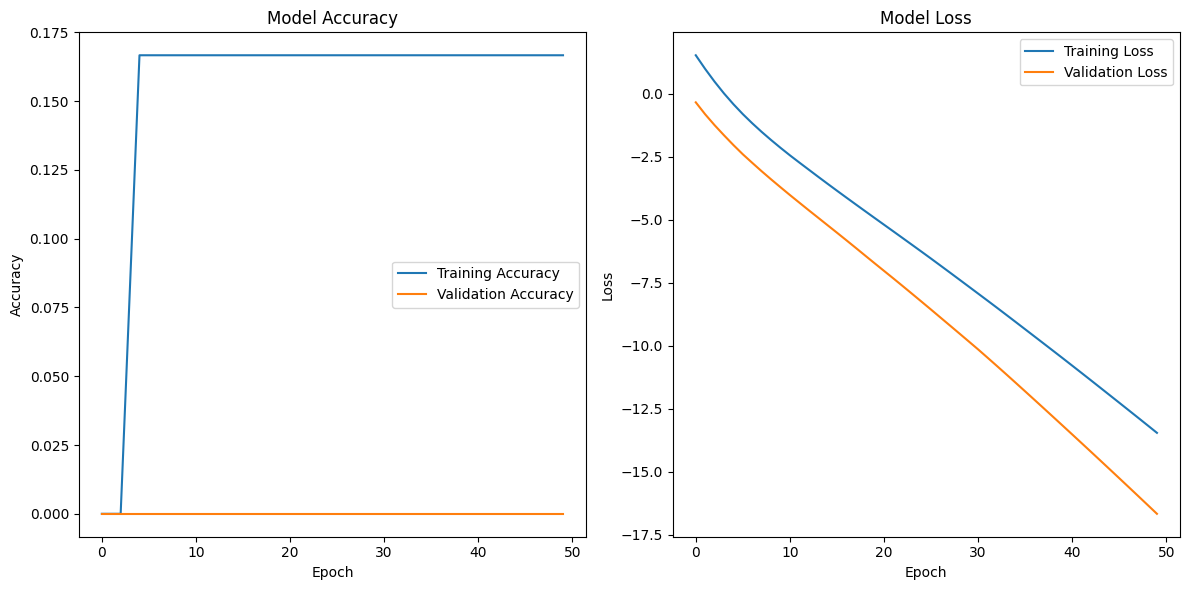

In [3]:
# Train the model
history = model.fit(train_generator, 
                    validation_data=validation_generator, 
                    epochs=50,  # Increase if validation performance improves
                    callbacks=[earlyStopping])

# Save the model after training
model.save('pixel_detection_model.h5')

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Load the Model

In [17]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

# Load the saved model
modelLoaded = load_model('./pixel_detection_model.h5')

# Compile the model (assuming 'adam' optimizer and 'binary_crossentropy' loss)
modelLoaded.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

## Validation

In [16]:
# Evaluate the model
loss, accuracy = modelLoaded.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1429 - loss: -14.1771

c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1429 - loss: -14.1771
Validation Accuracy: 14.29%


## F1 Score

> Done on 1200 images of caltech 256 image dataset (600 images in both classes)

In [14]:
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define the path to your saved model
model_path = './pixel_detection_model.h5'

# Load the saved model
modelLoaded = load_model(model_path)

# Define a function to load and crop images to 224x224
def load_and_crop(img_path):
    img = image.load_img(img_path)
    width, height = img.size
    left = (width - 224) // 2
    top = (height - 224) // 2
    right = left + 224
    bottom = top + 224
    img = img.crop((left, top, right, bottom))
    img = img.convert('RGB')  # Ensure the image is in RGB mode
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize pixel values
    return img

# Validation on 700 images of caltech 256 image dataset
path = 'D:\Pixelated-Image-Detection-Correction-main\Detection'  # Replace with your actual dataset path

# Prepare a validation data generator to get file paths and true labels
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Assuming binary classification (pixelated vs non-pixelated)
    shuffle=False  # Important: Do not shuffle for correct evaluation
)

# Manually load and crop images
all_images = []
true_labels = []
for i in range(len(validation_generator.filenames)):
    img_path = os.path.join(path, validation_generator.filenames[i])
    img = load_and_crop(img_path)
    all_images.append(img)
    true_labels.append(validation_generator.classes[i])

all_images = np.vstack(all_images)
true_labels = np.array(true_labels)

# Make predictions
predictions = modelLoaded.predict(all_images)

# Convert probabilities to class labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int)

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels)

print(f'F1 Score: {f1:.2f}')

<>:30: SyntaxWarning: invalid escape sequence '\P'
<>:30: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Admin\AppData\Local\Temp\ipykernel_18624\2462462626.py:30: SyntaxWarning: invalid escape sequence '\P'
  path = 'D:\Pixelated-Image-Detection-Correction-main\Detection'  # Replace with your actual dataset path


Found 14 images belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
F1 Score: 0.25


## Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

# Print precision, recall, and F1 score
from sklearn.metrics import classification_report
report = classification_report(true_labels, predicted_labels, target_names=['Non-Pixelated', 'Pixelated'])

print("Classification Report:")
print(report)


Confusion Matrix:
[[ 2  0]
 [12  0]]
Classification Report:
               precision    recall  f1-score   support

Non-Pixelated       0.14      1.00      0.25         2
    Pixelated       0.00      0.00      0.00        12

     accuracy                           0.14        14
    macro avg       0.07      0.50      0.12        14
 weighted avg       0.02      0.14      0.04        14



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Sample output for images of size 224x224

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


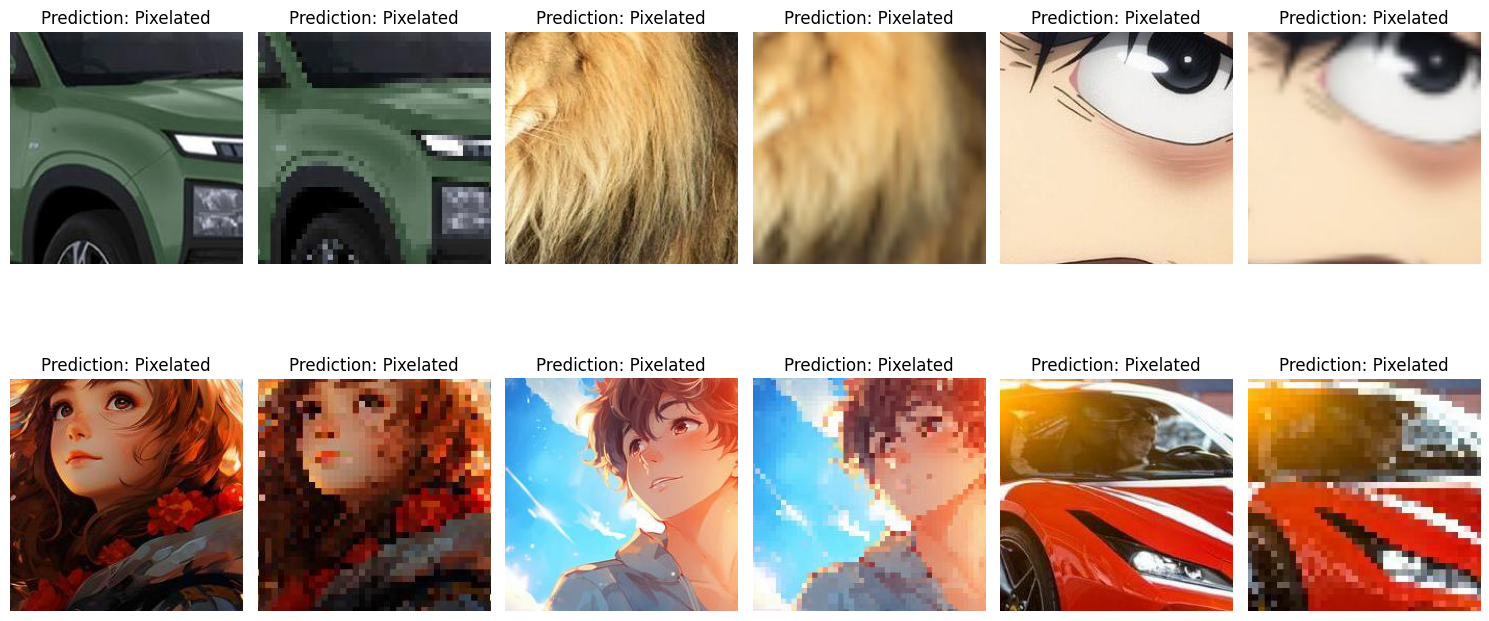

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path to the folder containing the images
folder_path = 'test_sample'  # Replace with your folder path

# Get list of all image files in the folder
image_files = sorted(os.listdir(folder_path))

# Load and preprocess images
images = []
for img_file in image_files:
    img_path = os.path.join(folder_path, img_file)
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize pixel values
    images.append(img)

images = np.vstack(images)  # Stack images into a single batch

# Make predictions using the loaded model
predictions = modelLoaded.predict(images)

# Convert predictions to class labels in words
predicted_labels = ['Pixelated' if pred > 0.5 else 'Non-Pixelated' for pred in predictions]

# Display images with predictions
plt.figure(figsize=(15, 8))
num_images = len(image_files)  # Total number of images in the folder
rows = 2  # Number of rows for subplot grid
cols = (num_images + rows - 1) // rows  # Calculate number of columns needed

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images[i])
    plt.title(f'Prediction: {predicted_labels[i]}')  # Display prediction
    plt.axis('off')

plt.tight_layout()
plt.show()


## Testing

<blockquote> Specify the folder path containing test images (any dimensions) </blockquote>


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Number of images: 12
Elapsed time: 1.09 seconds
FPS: 11.02


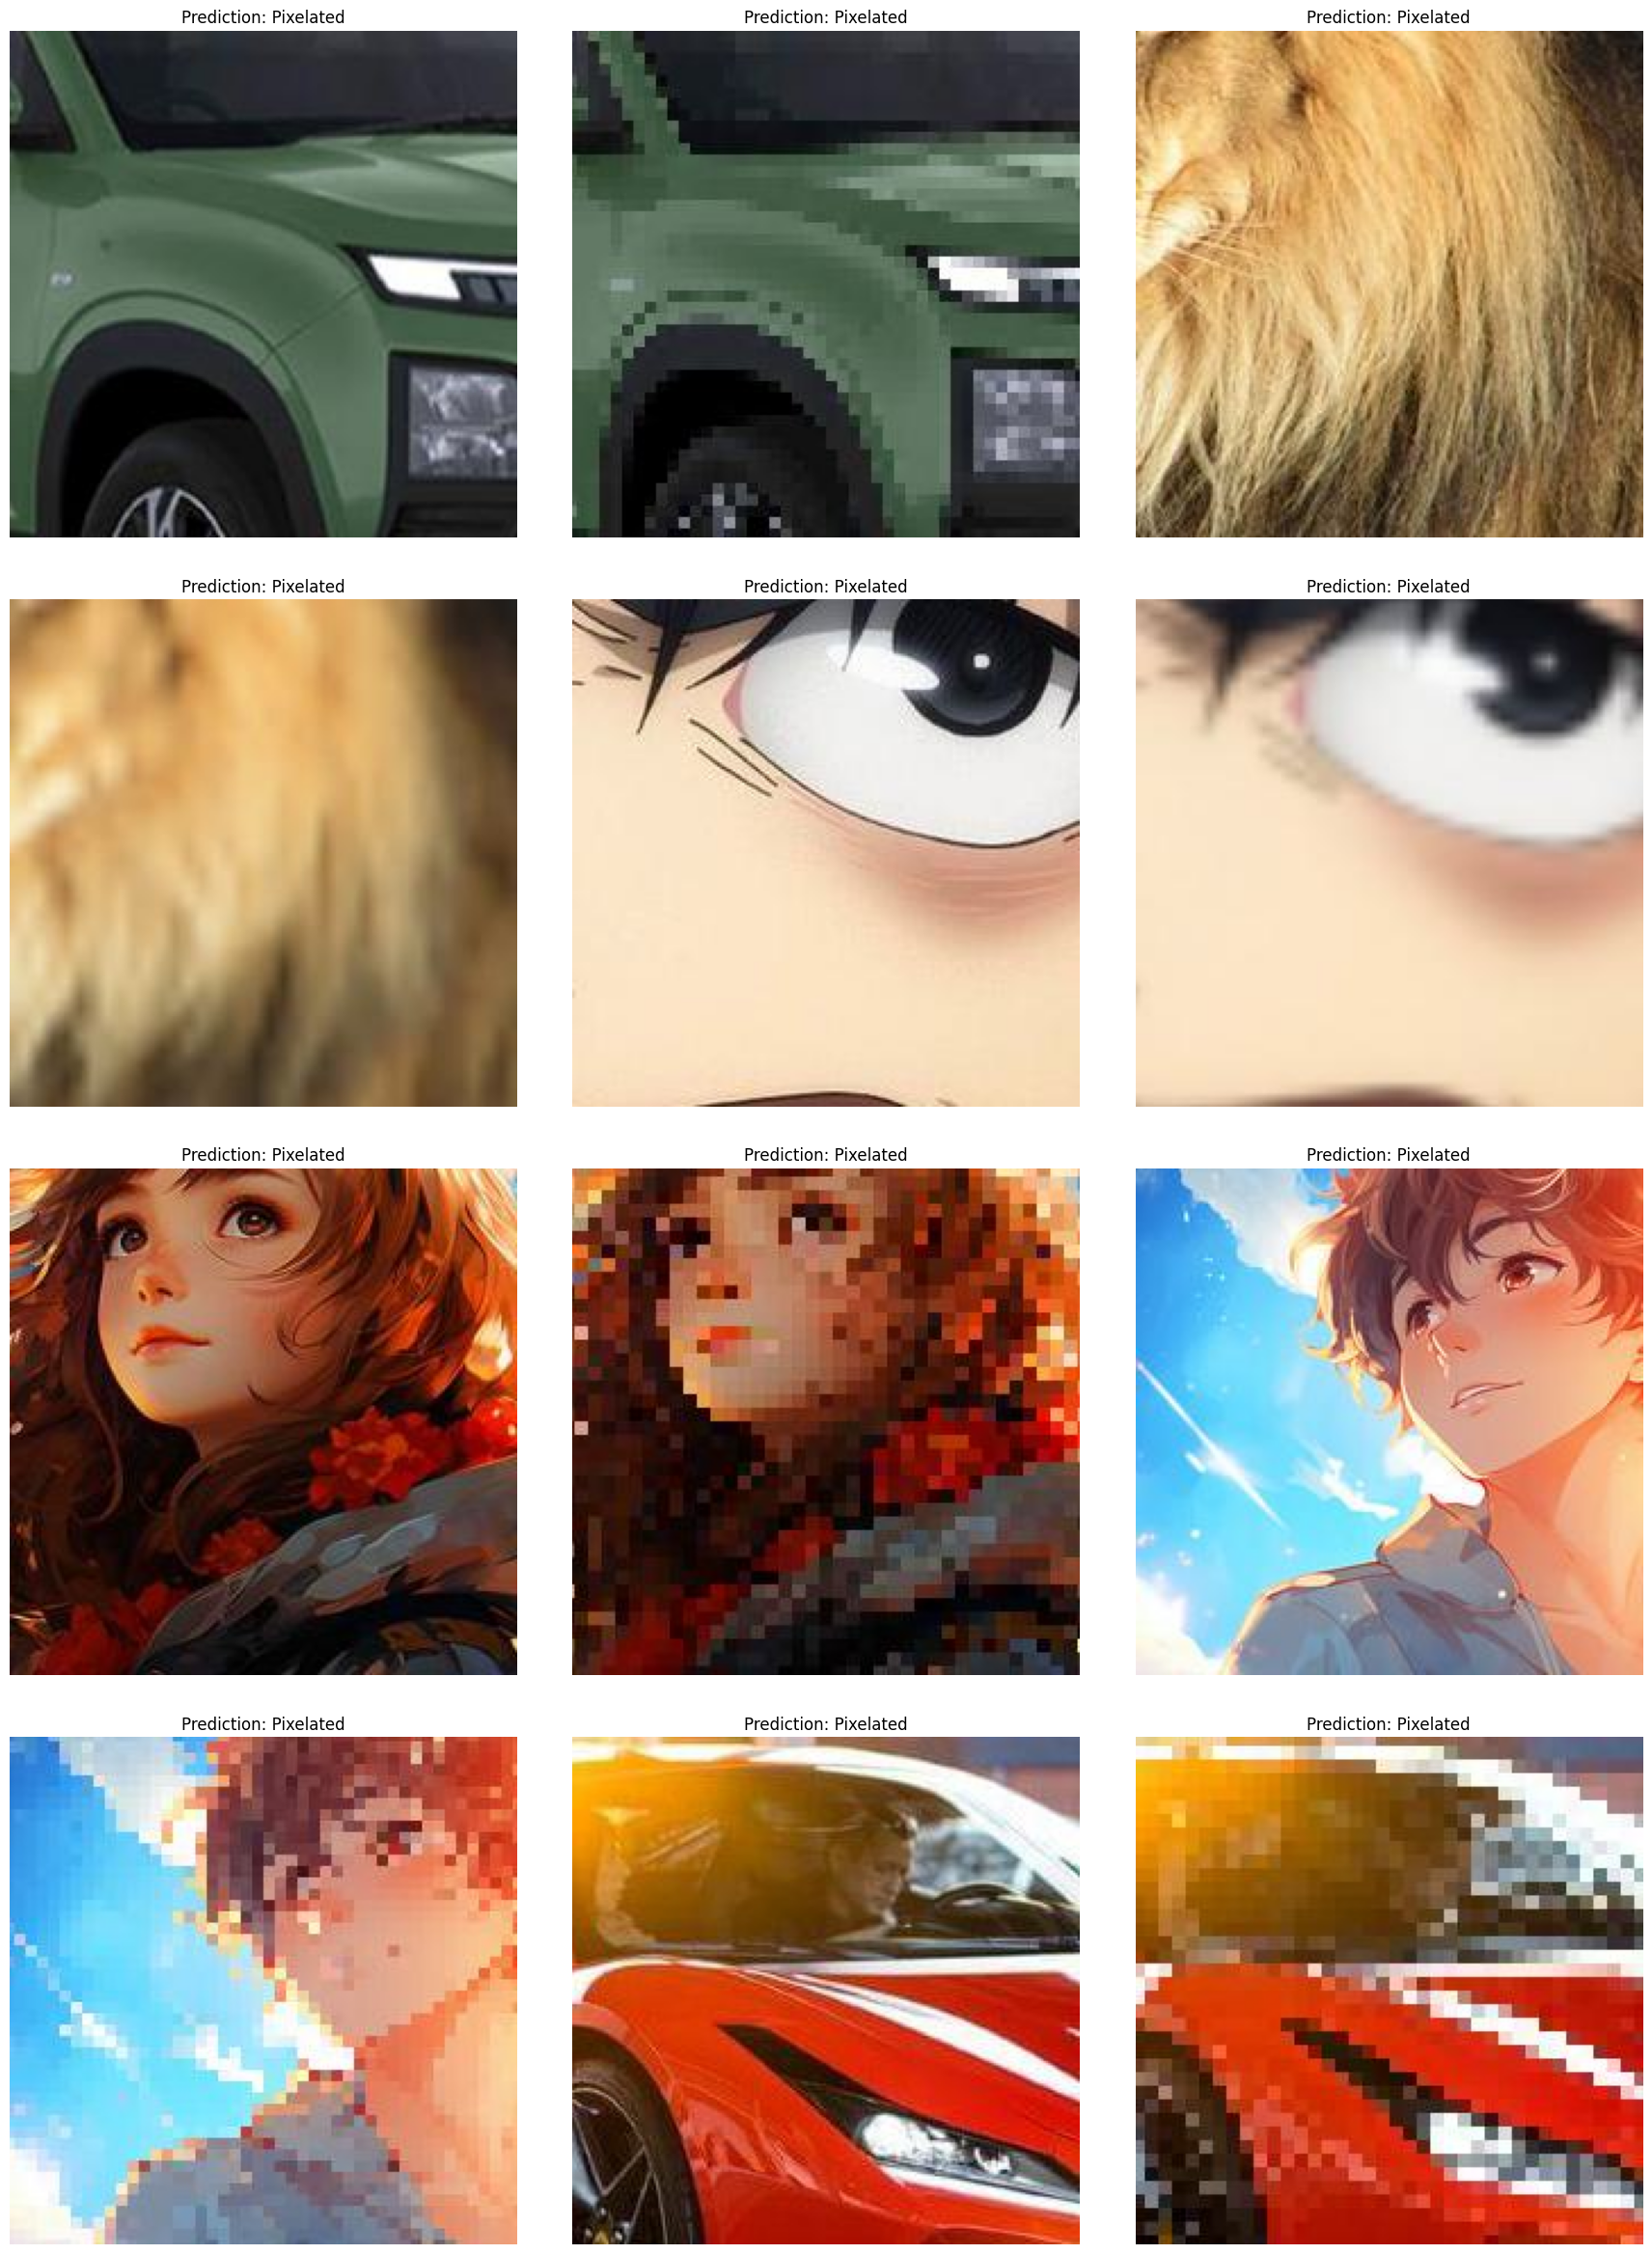

In [8]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path to the folder containing the images
folder_path = './test_sample'  # Replace with your folder path

image_files = sorted(os.listdir(folder_path))

# load and crop images to 224x224 
def load_and_crop(img_path):
    img = image.load_img(img_path)
    width, height = img.size
    left = (width - 224) // 2
    top = (height - 224) // 2
    right = left + 224
    bottom = top + 224
    img = img.crop((left, top, right, bottom))
    img = img.convert('RGB')  # Ensure the image is in RGB mode
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize pixel values
    return img # Return the cropped image

# Load and preprocess images
images = []
original_images = []

for img_file in image_files:
    img_path = os.path.join(folder_path, img_file)
    img = load_and_crop(img_path)
    original_img = image.load_img(img_path, target_size=(224, 224))  # Load original image
    original_images.append(original_img)
    images.append(img)

images = np.vstack(images)  # Stack images into a single batch

# Make predictions using the loaded model (Execute the "Load the Model" cell before this)
start_time = time.time()
predictions = modelLoaded.predict(images)
end_time = time.time()

# Calculate FPS
num_images = len(image_files)
elapsed_time = end_time - start_time
fps = num_images / elapsed_time

print(f"Number of images: {num_images}")
print(f"Elapsed time: {elapsed_time:.2f} seconds")
print(f"FPS: {fps:.2f}")

# Convert predictions to class labels in words
predicted_labels = ['Pixelated' if pred > 0.5 else 'Non-Pixelated' for pred in predictions]

# Calculate number of rows and columns for subplot grid
num_rows = (num_images + 2) // 3  # Display 3 images per row
num_cols = 3

# Adjust figure size based on number of images
plt.figure(figsize=(18, 6 * num_rows))

# Plot images with predictions
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    
    # Plot original image
    plt.imshow(original_images[i])
    
    # Display prediction
    plt.title(f'Prediction: {predicted_labels[i]}', fontsize=12)
    plt.axis('off')

plt.tight_layout(pad=3.0)  # spacing between subplots
plt.show()

## FPS Calculation

In [11]:
import os
import time
import numpy as np
from tensorflow.keras.preprocessing import image

# Path to the folder containing the images
folder_path = './test_sample'  # Replace with your folder path

image_files = sorted(os.listdir(folder_path))

# load and crop images to 224x224 
def load_and_crop(img_path):
    img = image.load_img(img_path)
    width, height = img.size
    left = (width - 224) // 2
    top = (height - 224) // 2
    right = left + 224
    bottom = top + 224
    img = img.crop((left, top, right, bottom))
    img = img.convert('RGB')  # Ensure the image is in RGB mode
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize pixel values
    return img # Return the cropped image

# Load and preprocess images
images = []
for img_file in image_files:
    img_path = os.path.join(folder_path, img_file)
    img = load_and_crop(img_path)
    images.append(img)

images = np.vstack(images)  # Stack images into a single batch

# Make predictions using the loaded model (Execute the "Load the Model" cell before this)
start_time = time.time()
predictions = modelLoaded.predict(images)
end_time = time.time()

# Calculate FPS
num_images = len(image_files)
elapsed_time = end_time - start_time
fps = num_images / elapsed_time

print(f"Number of images: {num_images}")
print(f"Elapsed time: {elapsed_time:.2f} seconds")
print(f"FPS: {fps:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Number of images: 12
Elapsed time: 0.19 seconds
FPS: 61.55
